**ПРИОРИТЕЗАЦИЯ ГИПОТЕЗ И А/В-ТЕСТ В КРУПНОМ ИНТЕРНЕТ-МАГАЗИНЕ**

Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

Задачи на проект:

Часть 1. Приоритизация гипотез.
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Часть 2. Анализ A/B-теста

Проанализируйте A/B-тест:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

## Подготовка данных

In [1]:
#импортируем библиотеки
import pandas as pd

import datetime as dt

from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import scipy.stats as stats

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_colwidth', 1000)

In [2]:
#извлекаем данные

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
#осуществим первичный взгляд

print('Метод head и info для таблиц')

display(hypothesis.head(10))
hypothesis.info()

display(orders.head())
orders.info()

display(visitors.head())
visitors.info()

Метод head и info для таблиц


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [4]:
#убрать пробелы и в нижний регистр
hypothesis.set_axis(['hypothesis','reach','impact','confidence','efforts'],axis='columns',inplace=True)
orders.set_axis(['transaction_id','user_id','date', 'revenue', 'group'],axis='columns',inplace=True)

#дату в надлежащий тип
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [5]:
#проверка на дубликаты
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0


In [6]:
#проверка пользователей, которые попали в две группы одновременно
print('Количество пользователей, которые есть в обоих группах: ',len(orders.groupby('user_id').agg({'group':'nunique'}).query('group > 1')))
print('Всего уникальных пользователей: ', orders['user_id'].nunique())

Количество пользователей, которые есть в обоих группах:  58
Всего уникальных пользователей:  1031


Обнаружено, что 58 уникальных пользователей попали в обе группы, что составляет 5,6% от всего количества пользователей.

Других ошибок в исходных данных не обнаружено, подправили только названия столбцов и тип данных для столбцов с датой.

## Приоритизация гипотез

Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета:

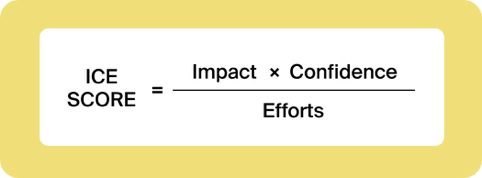

In [7]:
hypothesis['ICE'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']

display(hypothesis.sort_values(by='ICE',ascending=False)[{'hypothesis','ICE'}])


,ICE,hypothesis
8,16.200000,"Запустить акцию, дающую скидку на товар в день рождения"
0,13.333333,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
7,11.200000,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
6,8.000000,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
2,7.000000,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
1,2.000000,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,1.333333,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
3,1.125000,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
4,1.000000,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


Далее применим фреймворк RICE для приоритизации гипотез и отсортируем их по убыванию приоритета:

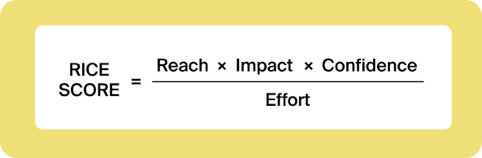

In [8]:
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']

display(hypothesis.sort_values(by='RICE',ascending=False)[{'hypothesis','RICE'}])

,RICE,hypothesis
7,112.0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
2,56.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
0,40.0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
6,40.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
8,16.2,"Запустить акцию, дающую скидку на товар в день рождения"
3,9.0,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
1,4.0,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,4.0,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
4,3.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


In [9]:
#выведем общую таблицу и выделим цветом по рангу

cm = sns.light_palette("green", as_cmap=True)

hypothesis[['hypothesis','ICE','RICE']].sort_values(by='RICE',ascending=False).style.background_gradient(cmap=cm)

,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2,112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7,56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3333,40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8,40
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125,9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33333,4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1,3


Мы видим, что топ-3 приоритезации гипотез для фреймворков ICE и RICE  практически разные. Это произошло потому, что в RICE добавлена переменная, отражающая возможный охват.

Например, гипотеза под номером 8 про день рождения улетела с 1 места в ICE на 5 место RICE, т.к. ее охват был оценен на минимально возможный уровень: единицу.

Гипотеза 2 про блоки рекомендаций поднялась с 5 на 2 место из-за ранга охвата в 9 баллов. 

Гипотеза пот номером 0 о добавлении новых каналов трафика не сильно потеряла позиции в рейтинге: с 2 на 3-е место, т.к. impact у этой гипотезы максимальный 10 баллов.

## Анализ A/B-теста

Построим график кумулятивной выручки по группам. 

In [10]:
# создаем массив уникальных пар значений дат и групп теста

datesGroup = orders[['date','group']].drop_duplicates()

In [11]:
#Соберём агрегированные кумулятивные по дням данные о заказа
ordersAggregated = datesGroup.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                                    .agg({'date':'max', 'group':'max', 'transaction_id':pd.Series.nunique, 'user_id':pd.Series.nunique, 'revenue':'sum'}), axis=1)\
                                    .sort_values(by=['date','group'])

#то же самое с посетителями
visitorsAggregated = datesGroup.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                                    .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1)\
                                    .sort_values(by=['date','group'])

#объединим две таблицы
cumData = ordersAggregated.merge(visitorsAggregated, left_on=['date','group'], right_on=['date','group'])
cumData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


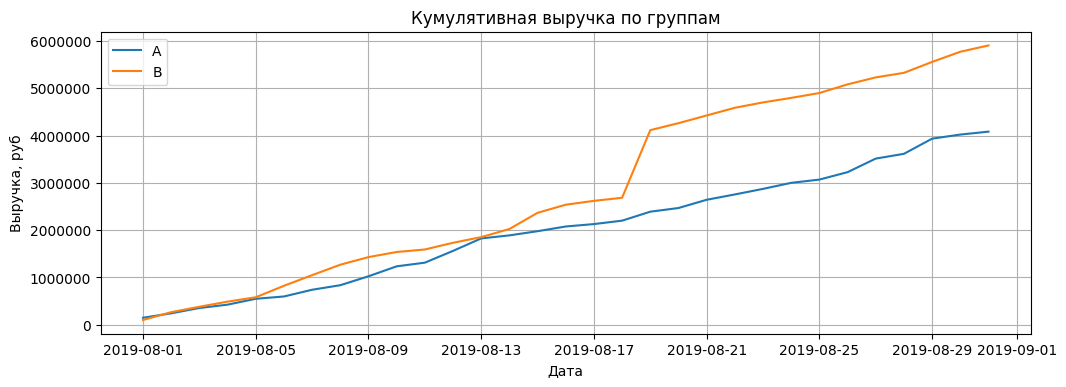

In [12]:
#построим графики кумулятивной выручки по дням и группам

#кумулятивное количество заказов и выручки по дням в группе А и В
cumRevenueA = cumData[cumData['group']=='A'][['date','revenue', 'orders']]
cumRevenueB = cumData[cumData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,4), dpi=100)
plt.grid()
plt.title('Кумулятивная выручка по группам')
plt.plot(cumRevenueA['date'], cumRevenueA['revenue'], label = 'A')
plt.plot(cumRevenueB['date'], cumRevenueB['revenue'], label = 'B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Выручка, руб')
plt.show()

А/В-тест длился весь календарный месяц - август 2019г. Из графика кумулятивной выручки по сырым данным видно, что примерно до 18 числа выручка по группам росла примерно равными темпами, и группа В показывала чуть лучшие результаты. Однако 19 августа в группе В наблюдается резкий скачок вверх примерно на 30%, и эта группа отрывается от А, далее до конца теста темпы прироста выручки практически одинаковы. Скорее всего тогда в группу В попали какие-то аномальные заказы, тем самым исказив график.

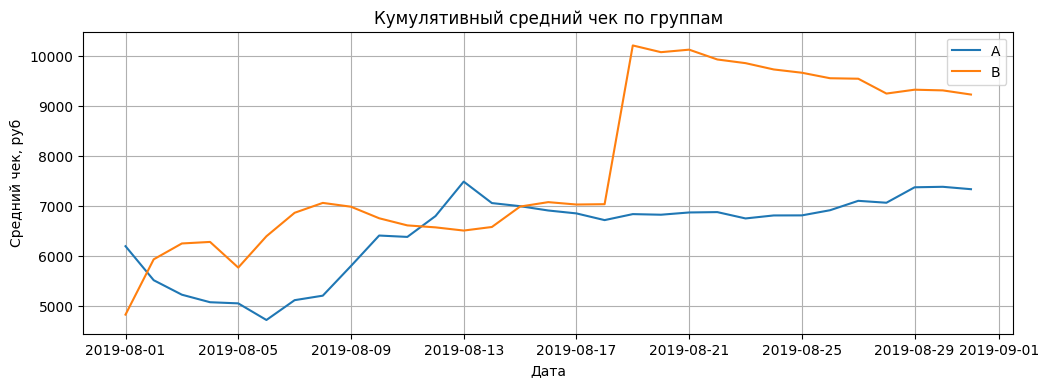

In [13]:
#построим график кумулятивного среднего чека

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(12,4), dpi=100)
plt.grid()
plt.title('Кумулятивный средний чек по группам')
plt.plot(cumRevenueA['date'], cumRevenueA['revenue']/cumRevenueA['orders'], label = 'A')
plt.plot(cumRevenueB['date'], cumRevenueB['revenue']/cumRevenueB['orders'], label = 'B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Средний чек, руб')
plt.show()

Средний чек примерно до 15 числа скачет и потом устаканивается, однако здесь опять виднен гигантский скачок в группе В. Видимо в тот день пришли несколько аномально крупных заказов, и из-за этого сложно сделать предположения о разнице в средних чеках по группам.

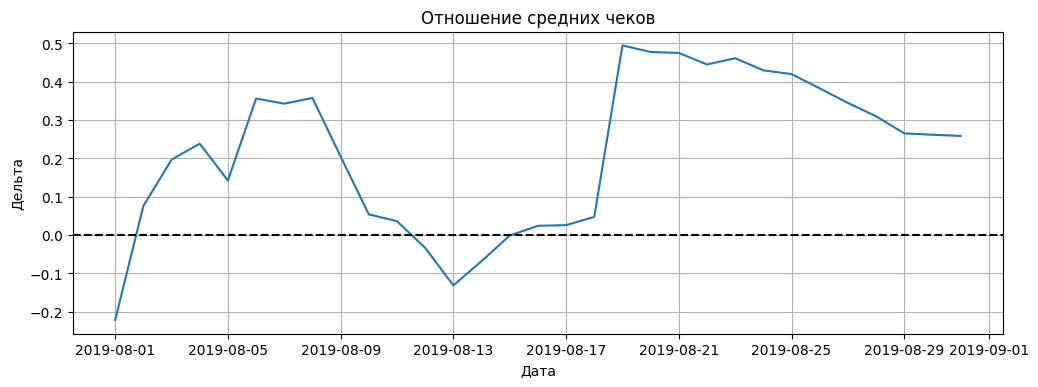

In [14]:
#построим график относительного различия для среднего чека

mergedCumRevenue = cumRevenueA.merge(cumRevenueB, left_on='date', right_on='date', how='left', suffixes=['A','B'])

plt.figure(figsize=(12,4), dpi=100)
plt.grid()
plt.title('Отношение средних чеков')
plt.plot(mergedCumRevenue['date'], (mergedCumRevenue['revenueB']/mergedCumRevenue['ordersB'])/(mergedCumRevenue['revenueA']/mergedCumRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Дельта')
plt.show()

Как раз когда средний чек по группам начал выравниваться, пришла аномалия и все сломала. Вероятно средний чек группы В потом опустился бы ниже ватерлинии, но это только догадка, надо очищать информацию от выбросов.

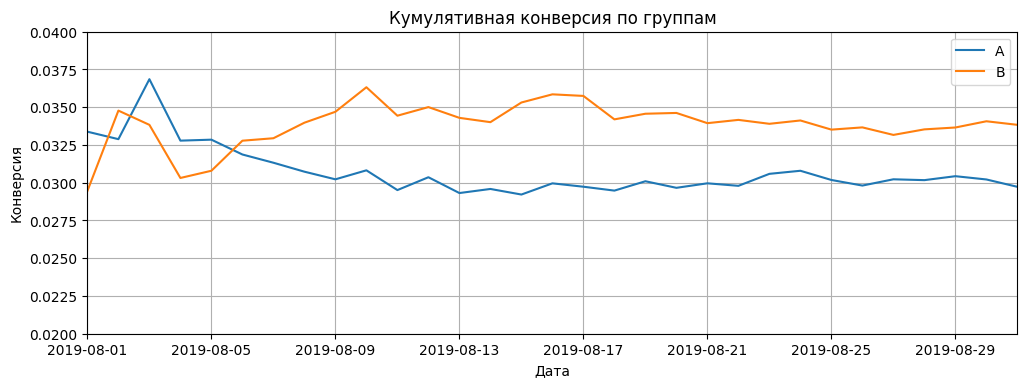

In [15]:
#проанализируем график кумулятивной конверсии
cumData['conversion'] = cumData['orders']/cumData['visitors']
cumDataA = cumData[cumData['group']=='A']
cumDataB = cumData[cumData['group']=='B']

plt.figure(figsize=(12,4), dpi=100)
plt.grid()
plt.title('Кумулятивная конверсия по группам')
plt.plot(cumDataA['date'], cumDataA['conversion'], label = 'A')
plt.plot(cumDataB['date'], cumDataB['conversion'], label = 'B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.axis(["2019-08-01","2019-08-31",0.02,0.04])
plt.show()

Конверсии понадобилось меньше времени, чтобы зафиксироваться (около недели), и по сырым данным видно, что после накопления достаточного количества данных конверсия группы В оторвалась на очень приличное расстояние и сохранила лидерство до конца теста. 

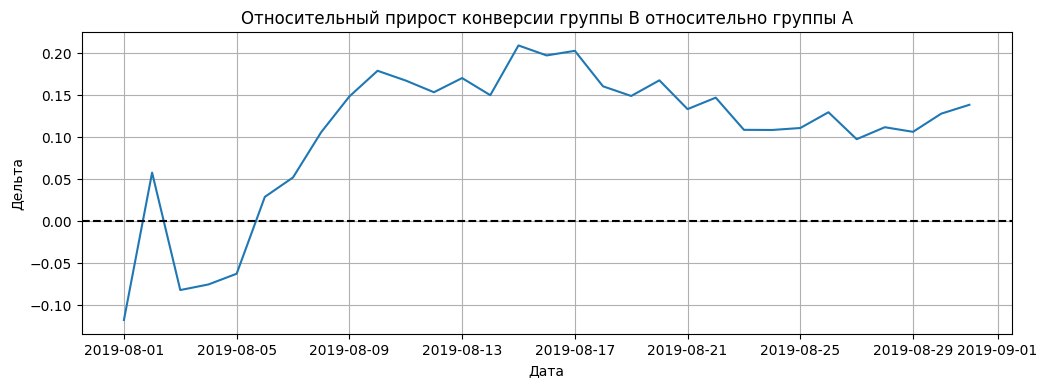

In [16]:
#построим график относительного различия кумулятивных конверсий

mergedCumConversion = cumDataA[['date','conversion']]\
.merge(cumDataB[['date','conversion']], left_on='date',right_on='date',how='left',suffixes=['A','B'])

plt.figure(figsize=(12,4), dpi=100)
plt.grid()
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.plot(mergedCumConversion['date'], mergedCumConversion['conversionB']/mergedCumConversion['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Дельта')
plt.show()

На графике отношения конверсий видно то самое приличное расстояние составляет 10-20% в пользу группы В. По сырым данным  сложно сделать какие-то однозначные выводы касательно выручки и среднего чека, однако конверсия в группе В определенно лучше.

Теперь необходимо очистить данные от аномалий, чтобы сделать более точные выводы.

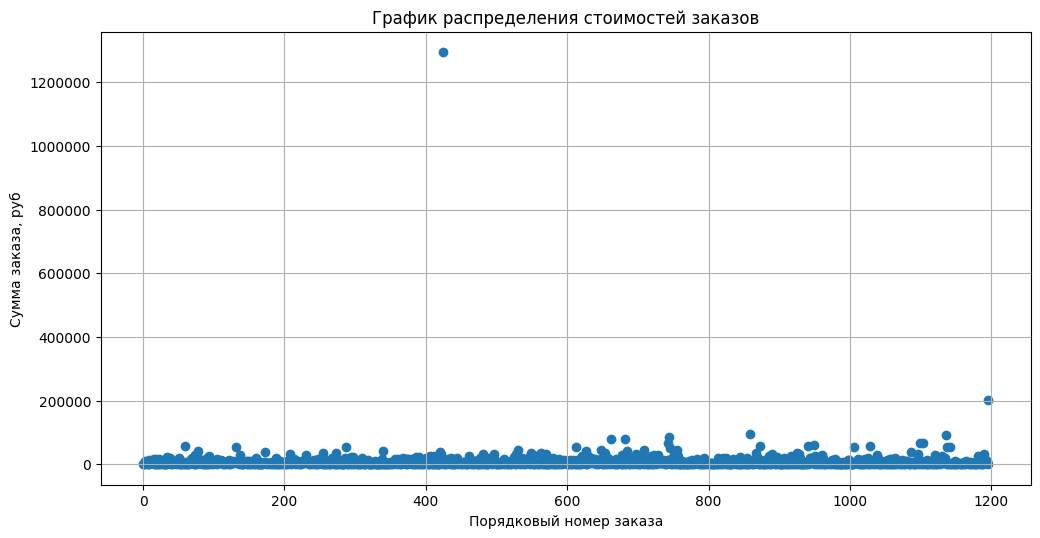

,transaction_id,user_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B


In [17]:
#изучим график распределения стоимостей заказов

order_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(12,6), dpi=100)
plt.grid()
plt.title('График распределения стоимостей заказов')
plt.scatter(order_values, orders['revenue'])
plt.xlabel('Порядковый номер заказа')
plt.ylabel('Сумма заказа, руб')
plt.show()

#плюс посмотрим топ-5
orders.sort_values(by='revenue', ascending=False).head(5)

На графике определенно виден гигантский выброс в 1,3млн и еще один в 202тыс, когда все остальные заказы укладываются в порог 100 тысяч. Они явно аномалии, применим метод перцентилей, чтобы отсечь лишнее.

In [18]:
print(np.percentile(orders['revenue'], [95,99]))

[28000.  58233.2]


Не более 5% заказов дороже 28000, и не более 1% дороже 58223 рублей. Логично отсечь выборку по 99-му перцентилю, визуально это будет правильным решением, и мы применим минимальные изменения к выборке.

Проделаем ту же самую работу в отношении параметра количества заказов на пользователя.

In [19]:
orders_by_users = orders.drop(['group','revenue','date'],axis=1)\
                                .groupby('user_id', as_index=False)\
                                .agg({'transaction_id':pd.Series.nunique})
orders_by_users.columns=['user_id','orders']
display(orders_by_users.sort_values(by='orders',ascending=False).head(10))

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Видим, что есть пользователи, которые совершали 5,8,9,11 заказов, и они конечно являются очень важными для интернет-магазина (очень лояльные покупатели), однако они могут сильно повлиять на конверсию, и их лучше исключить из выборки.

Построим точечную диаграмму. 

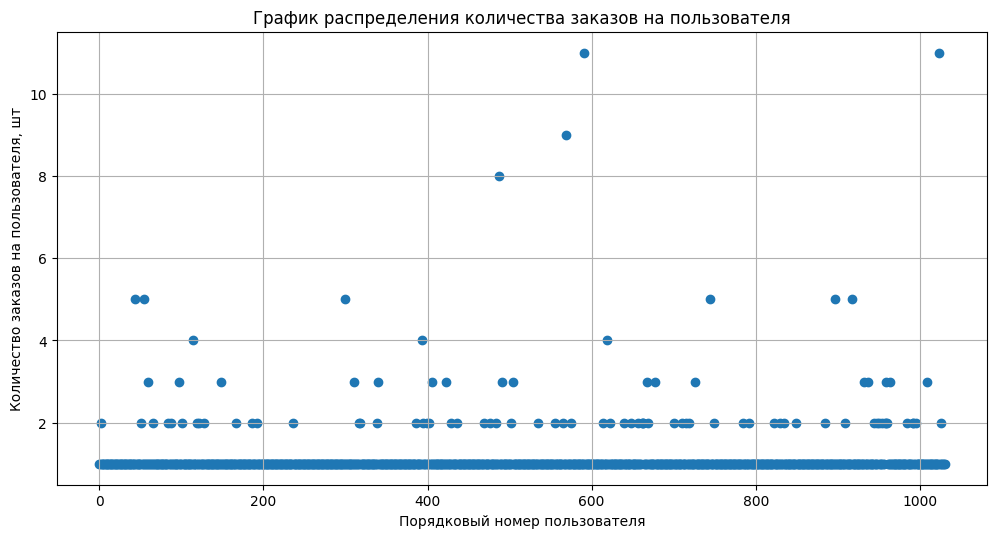

In [20]:
orders_by_users_values = pd.Series(range(0,len(orders_by_users)))

plt.figure(figsize=(12,6), dpi=100)
plt.grid()
plt.title('График распределения количества заказов на пользователя')
plt.scatter(orders_by_users_values, orders_by_users['orders'])
plt.xlabel('Порядковый номер пользователя')
plt.ylabel('Количество заказов на пользователя, шт')
plt.show()

Пользователей с количеством заказов больше 3 визулаьно очень мало, их можно посчитать по пальцам. Вероятно, спрос на товары интернет-магазина нельзя назвать регулярным. Посчитаем перцентили, чтобы точно выяснить, кого считать аномалией.

In [21]:
print(np.percentile(orders_by_users['orders'], [95,99]))

[2. 4.]


Не более 5% пользователей совершили больше 2х заказов, и не более 1% больше 4 заказов. Логично отсечь пользователей по 4-м заказам, чем по 2-м: один заказ в неделю не кажется чем-то из ряда вон выходящим, и 3 юзера не сделают нам большого влияния со своими 4-мя заказами.

Поэтому в общем итоге примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ на сумму больше 60 000 рублей.

Теперь посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным.

Сформируем следующие гипотезы для проверки: 
- Нулевая гипотеза: **статистическая значимость в различиях конверсии/среднего чека между группами отсутствует**
- Альтернативная гипотеза: **статистическая значимость в различиях конверсии/среднего чека между группами есть**. 

In [22]:
#подготовим данные для анализа

#визиты по дням и накопительные для группы А
visitorsADaily = visitors[visitors['group']=='A'][['date','visitors']]
visitorsADaily.columns=['date','visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date']<=x['date']]\
                                           .agg({'date':'max','visitorsPerDateA':'sum'}),axis=1)
visitorsACummulative.columns=['date','visitorsCumA']

#визиты по дням и накопительные для группы В
visitorsBDaily = visitors[visitors['group']=='B'][['date','visitors']]
visitorsBDaily.columns=['date','visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date']<=x['date']]\
                                           .agg({'date':'max','visitorsPerDateB':'sum'}),axis=1)
visitorsBCummulative.columns=['date','visitorsCumB']

#заказы по дням и накопительные для группы A
ordersADaily = orders[orders['group']=='A'][['date','transaction_id','user_id','revenue']]\
                                            .groupby('date',as_index=False)\
                                            .agg({'transaction_id':pd.Series.nunique,'revenue':'sum'})
ordersADaily.columns=['date','ordersPerDateA','revenuePerDateA']

ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date']<=x['date']]\
                                           .agg({'date':'max','ordersPerDateA':'sum','revenuePerDateA':'sum'}),axis=1)\
                                        .sort_values(by=['date'])
ordersACummulative.columns=['date','ordersCumA','revenueCumA']

#заказы по дням и накопительные для группы B

ordersBDaily = orders[orders['group']=='B'][['date','transaction_id','user_id','revenue']]\
                                            .groupby('date',as_index=False)\
                                            .agg({'transaction_id':pd.Series.nunique,'revenue':'sum'})
ordersBDaily.columns=['date','ordersPerDateB','revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date']<=x['date']]\
                                           .agg({'date':'max','ordersPerDateB':'sum','revenuePerDateB':'sum'}),axis=1)\
                                        .sort_values(by=['date'])
ordersBCummulative.columns=['date','ordersCumB','revenueCumB']

#сшиваем полученное в одну талицу

data = (
    ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCumA,revenueCumA,ordersCumB,revenueCumB,visitorsPerDateA,visitorsPerDateB,visitorsCumA,visitorsCumB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [23]:
#создадим переменные, где укажем число совершённых заказов для юзеров, которые делали минимум 1 заказ

ordersByUsersA = (orders[orders['group']=='A']
                 .groupby('user_id', as_index=False)
                 .agg({'transaction_id':pd.Series.nunique}))
ordersByUsersA.columns=['user_id','orders']

ordersByUsersB = (orders[orders['group']=='B']
                 .groupby('user_id', as_index=False)
                 .agg({'transaction_id':pd.Series.nunique}))
ordersByUsersB.columns=['user_id','orders']

#объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов 
#тем, кто ничего не заказал, будут соответствовать нули

sampleA = pd.concat([ordersByUsersA['orders'],\
                     pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),\
                    name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],\
                     pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),\
                    name='orders')],axis=0)

print('Статистическая значимость различий в конверсии между группами по «сырым» данным: {0:.3f}'.format(stats.mannwhitneyu(sampleA,sampleB, alternative="two-sided")[1]))

alpha = 0.05  # критический уровень статистической значимости

results = stats.mannwhitneyu(sampleA,sampleB, alternative="two-sided")[1]

if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    

print('Относительное различие в конверсии между группами : {0:.3f}'.format(sampleB.mean()/sampleA.mean()-1))

Статистическая значимость различий в конверсии между группами по «сырым» данным: 0.017
Отвергаем нулевую гипотезу: разница статистически значима
Относительное различие в конверсии между группами : 0.138


По сырым данным различия конверисии в группе А и В есть, т.к. p-value получился 0.017, что меньше 0.05 (критического уровня статистической значимости), и нулевая гипотеза об отсутствии различий отвергается. Это косвенно подтверждается вторым числом: относительной разницей конверсии группы В к группе А на 13,8%.

Различия по конверсии посчитали, теперь посмотрим средний чек.

In [24]:
print('Cтатистическая значимость различий в среднем чеке между группами по «сырым» данным: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],orders[orders['group']=='B']['revenue'], alternative="two-sided")[1]))

results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],orders[orders['group']=='B']['revenue'], alternative="two-sided")[1]

if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    

print('Относительные различия в среднем чеке между группами: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Cтатистическая значимость различий в среднем чеке между группами по «сырым» данным: 0.729
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительные различия в среднем чеке между группами: 0.259


Вывод: По «сырым» данным различий в среднем чеке у групп A и B нет. p-value = 0.729 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем. 
Но отношение среднего чека в группе В на 25,9% больше, вероятно, туда попали заказы с аномально высоким чеком.


Теперь возмемся "очищать" данные. Как мы выяснили выше, за аномальных пользователей возмем с 5 и более заказов и тех, чей заказ вышел дороже 60000 рублей. Так мы уберем от 1 до 5% пользователей со слишком большими заказами и их наиболее высоким числом.

In [25]:
usersManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders']>4]['user_id'], ordersByUsersB[ordersByUsersB['orders']>4]['user_id']],axis=0)

usersExpensiveOrders = pd.concat([orders[orders['revenue']>60000]['user_id']],axis=0)

abnormalUsers = pd.concat([usersManyOrders,usersExpensiveOrders],axis=0).drop_duplicates().sort_values()

display(abnormalUsers)
display(abnormalUsers.shape)

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
858     1316129916
425     1920142716
227     2038680547
1196    2108080724
326     2378935119
278     2458001652
743     4133034833
499     4256040402
662     4266935830
Name: user_id, dtype: int64

(14,)

Вычислили 14 аномальных пользователей из всей выборки. Узнаем, как они повлияли на резульаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным.

In [26]:
sampleAfilt = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))]['orders'],
                       pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum()-len(ordersByUsersA['orders'])),
                                name='orders')],axis=0)

sampleBfilt = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))]['orders'],
                       pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum()-len(ordersByUsersB['orders'])),
                                name='orders')],axis=0)

#применим критерий Манна-Уитни

print('Статистическая значимость различий в конверсии между группами по «очищенным» данным: {0:.3f}'.format(stats.mannwhitneyu(sampleAfilt,sampleBfilt, alternative="two-sided")[1]))

results = stats.mannwhitneyu(sampleAfilt,sampleBfilt, alternative="two-sided")[1]

if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    

print('Относительное различие в конверсии между группами : {0:.3f}'.format(sampleBfilt.mean()/sampleAfilt.mean()-1))

Статистическая значимость различий в конверсии между группами по «очищенным» данным: 0.013
Отвергаем нулевую гипотезу: разница статистически значима
Относительное различие в конверсии между группами : 0.155


По очищенным данным также, как и по сырым, статистические различия в конверсии между группами есть: p-value получился почти таким же (0.013), а относительная разница выросла с 13,8% до 15,5%. Здесь с большой уверенностью можно предполагать, что в группе В намного лучше конверсия. Теперь проверим средний чек.

In [27]:
sampleAfilt_meancheck = orders[np.logical_and(orders['group']=='A',
                            np.logical_not(orders['user_id'].isin(abnormalUsers)))]['revenue']

sampleBfilt_meancheck = orders[np.logical_and(orders['group']=='B',
                            np.logical_not(orders['user_id'].isin(abnormalUsers)))]['revenue']

print('Статистическая значимость различий в среднем чеке между группами по «очищенным» данным: {0:.3f}'.format(stats.mannwhitneyu(sampleAfilt_meancheck,sampleBfilt_meancheck, alternative="two-sided")[1]))

results = stats.mannwhitneyu(sampleAfilt_meancheck,sampleBfilt_meancheck, alternative="two-sided")[1]

if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

print('Относительные различия в среднем чеке между группами: {0:.3f}'.format(sampleAfilt_meancheck.mean()/sampleBfilt_meancheck.mean()-1))



Статистическая значимость различий в среднем чеке между группами по «очищенным» данным: 0.814
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительные различия в среднем чеке между группами: -0.007


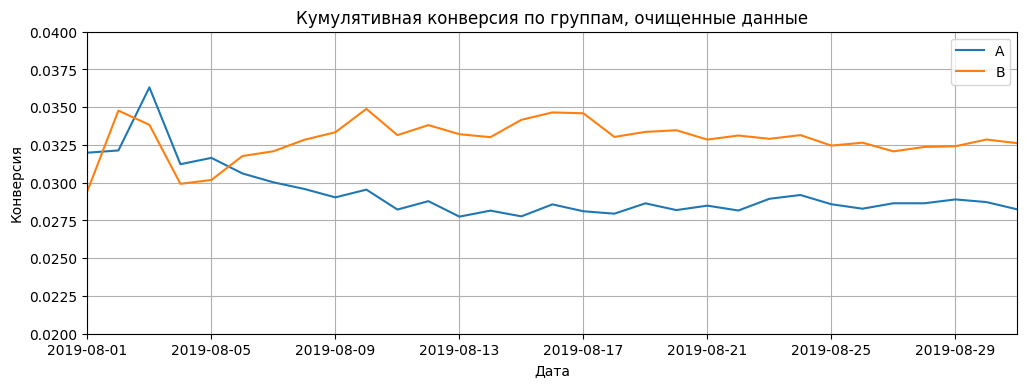

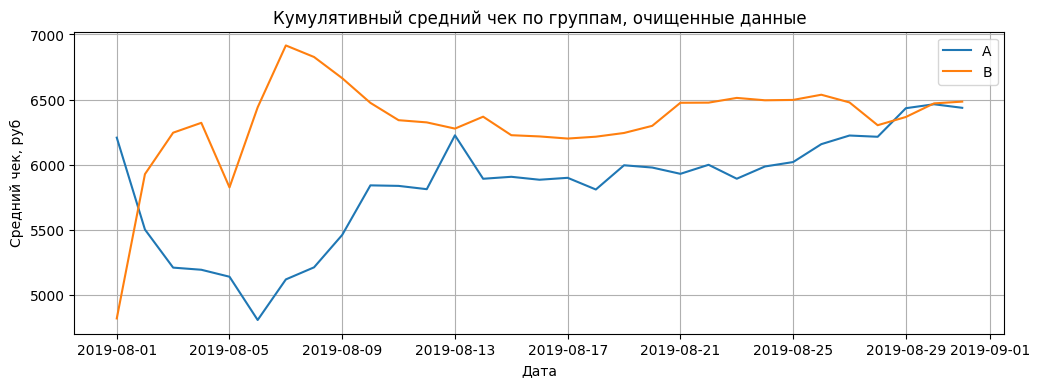

In [28]:
#строим графики кумулятивной конверсии и среднего чека по очищенным данным
orders_ok = orders.query('user_id not in @abnormalUsers')


ordersFiltered = datesGroup.apply(lambda x: orders_ok[np.logical_and(orders_ok['date'] <= x['date'], orders_ok['group'] == x['group'])]\
                                    .agg({'date':'max', 'group':'max', 'transaction_id':pd.Series.nunique, 'user_id':pd.Series.nunique, 'revenue':'sum'}), axis=1)\
                                    .sort_values(by=['date','group'])

cumDataFilt = ordersFiltered.merge(visitorsAggregated, left_on=['date','group'], right_on=['date','group'])
cumDataFilt.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


cumDataFilt['conversion'] = cumDataFilt['orders']/cumDataFilt['visitors']             
cumDataAFilt = cumDataFilt[cumData['group']=='A']
cumDataBFilt = cumDataFilt[cumData['group']=='B']

cumRevenueAfilt = cumDataFilt[cumDataFilt['group']=='A'][['date','revenue', 'orders']]
cumRevenueBfilt = cumDataFilt[cumDataFilt['group']=='B'][['date','revenue', 'orders']]


plt.figure(figsize=(12,4), dpi=100)
plt.grid()
plt.title('Кумулятивная конверсия по группам, очищенные данные')
plt.plot(cumDataAFilt['date'], cumDataAFilt['conversion'], label = 'A')
plt.plot(cumDataBFilt['date'], cumDataBFilt['conversion'], label = 'B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.axis(["2019-08-01","2019-08-31",0.02,0.04])
plt.show()

plt.figure(figsize=(12,4), dpi=100)
plt.grid()
plt.title('Кумулятивный средний чек по группам, очищенные данные')
plt.plot(cumRevenueAfilt['date'], cumRevenueAfilt['revenue']/cumRevenueAfilt['orders'], label = 'A')
plt.plot(cumRevenueBfilt['date'], cumRevenueBfilt['revenue']/cumRevenueBfilt['orders'], label = 'B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Средний чек, руб')
plt.show()

По очищенным данным также статистических различий в среднем чеке у групп A и B нет, p-value увеличился, но незначительно: с 0,365 до 0,814. И здесь отчетливо можно увидеть влияние выбросов на выборку: относительное различие в среднем чеке упало с 25,9% до -0,7%, то есть средний чек практически не изменился.

Также при построении графиков кумулятивной конверсии и среднего чека по очищенным данным видно, что средний чек к концу эксперимента выровнялся, а конверсия у группы В также значительно выше.

## Общий вывод

При предобработке данных было обнаружено, что 58 уникальных пользователей оказались в выборке по обеим группам A/B-теста. Учитывая, что всего в тестировании приняло участие 1031 пользователь, такое количество (5,6%) можно принять за погрешность, т.к. идеальных условий для А/В-теста достичь невозможно.

Приоритезация гипотез по фреймворкам ICE и RICE дала разные результаты: топ-3 гипотез у каждого метода отличаются. Это произошло потому, что в RICE добавлена переменная, отражающая возможный охват, и гипотезы скорректировали свой ранг в этом фреймворке. 

Топ-3 по ICE:
- Запустить акцию, дающую скидку на товар в день рождения
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Топ-3 по RICE:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

При анализе результатов А/В-теста были выявлены факты о том, что конверсия увеличилась на 15,5% при нетронутом среднем чеке и обнаруженном статистическом различии в конверсии как по сырым, так и по очищенным данным. График конверсии также сообщает о том, что тенденций к спаду группы В не ожидается, поэтому можно сделать вывод о том, что тест можно останавливать и признать его очень успешным: мы увеличили конверсию в группе В и не уронили там  средний чек, как это обычно бывает, например при агрессивных акциях или при стимулировании покупателя быстро сделать заказ, не обращая внимание на глубину продуктовой корзины.
